#### IMPORTING LIBRARIES

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm
import warnings
from sklearn.linear_model import LinearRegression
import itertools
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore") # specify to ignore warning messages

#### Load the dataset and quick preview


In [141]:
air_dataset = pd.read_csv("D:/Python lab assignment/python datasets/air_pollution.csv")
air_dataset.head()

,date,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
0,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
1,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
3,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
4,2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [142]:
air_dataset.describe()


,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,98.245080,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023,98.245080
std,76.807697,14.163508,11.552997,10.076053,41.373161,0.546072,0.993917,76.807697
min,3.166667,-33.333333,-14.458333,994.041667,1.412500,0.000000,0.000000,3.166667
25%,42.333333,-10.083333,1.541667,1007.916667,5.904167,0.000000,0.000000,42.333333
50%,79.166667,2.041667,13.916667,1016.208333,10.953750,0.000000,0.000000,79.166667
75%,131.166667,15.083333,23.166667,1024.541667,22.235000,0.000000,0.000000,131.166667
max,541.895833,26.208333,32.875000,1043.458333,463.187917,14.166667,17.583333,541.895833


#### Plotting -Air Pollution- as a feature value


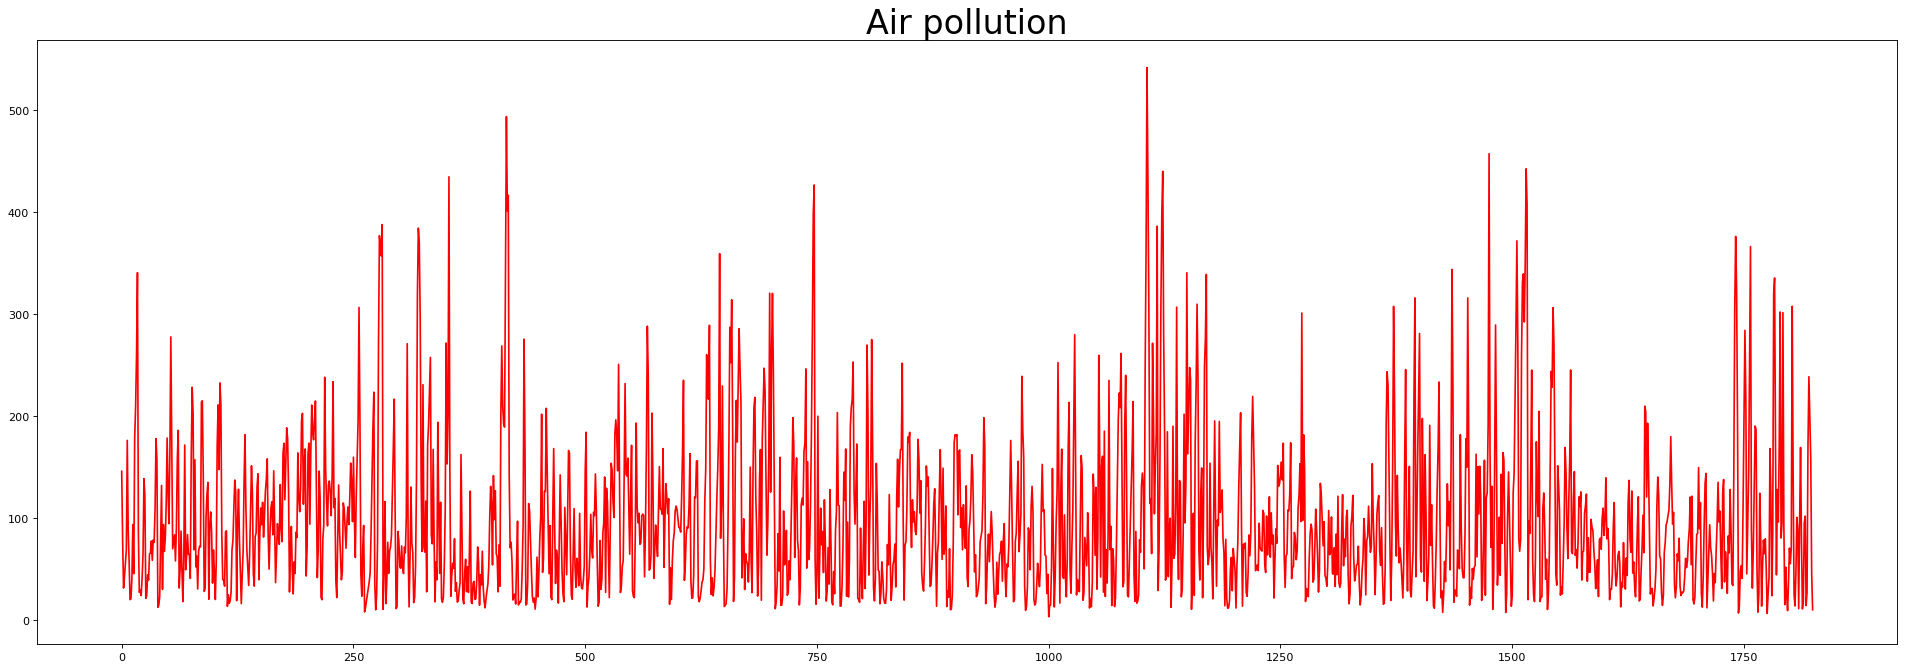

In [143]:
plt.figure(figsize=(30, 10), dpi = 80)
plt.title('Air pollution', fontsize=30)

plt.plot(air_dataset.pollution_today, color='red')

#### Decomposing the time series


One of the most common analyses for time series is to break them down into several parts. The parts into which we can divide a time series are: level, trend, seasonality and noise, all series contain level and noise but seasonality and trend are not always present (there will be more analysis for these two parts).

These 4 parts can be combined additively or multiplicatively in the time series.
.

* ADDITIVIE MODEL
y(t) = Level + Trend + Seasonality + Noise

* MULTIPLICATIVE MODEL
y(t) = Level * Trend * Seasonality * Noise


Multiplicative models are non-linear, the trend is curved and seasonality is not constant. Change is not constant over time.

The decomposition is used to analyze the time series. Identify each of the different parts of the time series and its behavior, each of the components can affect your models in different ways.

Most time series are a combination of an additive model and a multiple model, it is difficult to identify real-world time series in a single model.

#### AUTOMATIC TIME SERIES DECOMPOSITION
The python Statsmodel library provides a seasonal_compose() function to automatically decompose a time series.




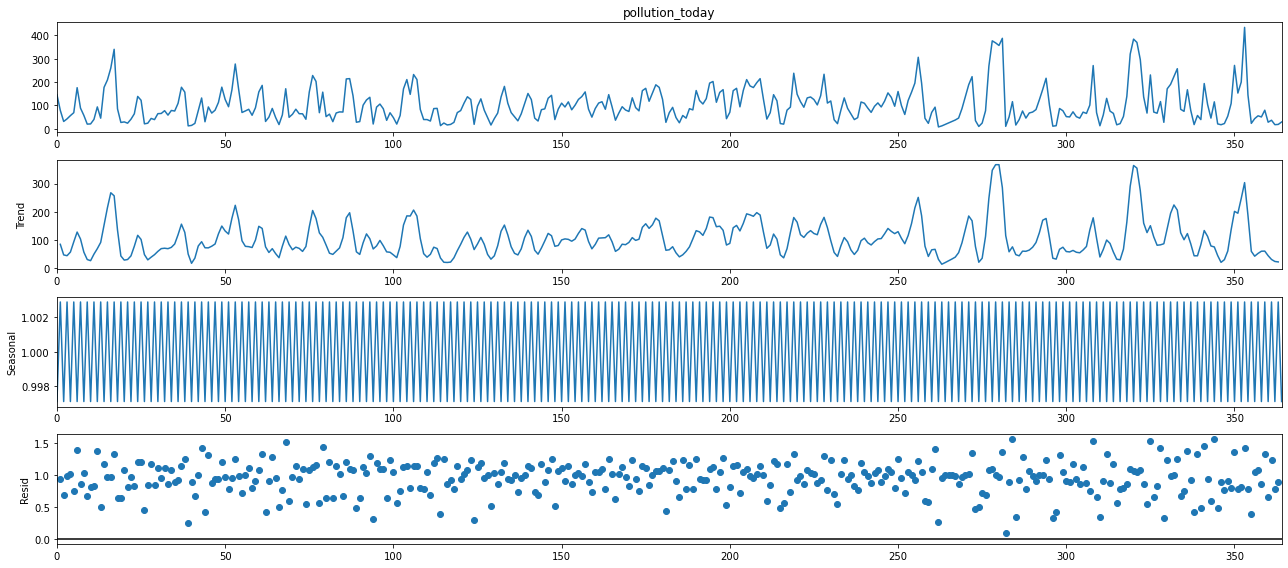

<Figure size 5600x2400 with 0 Axes>

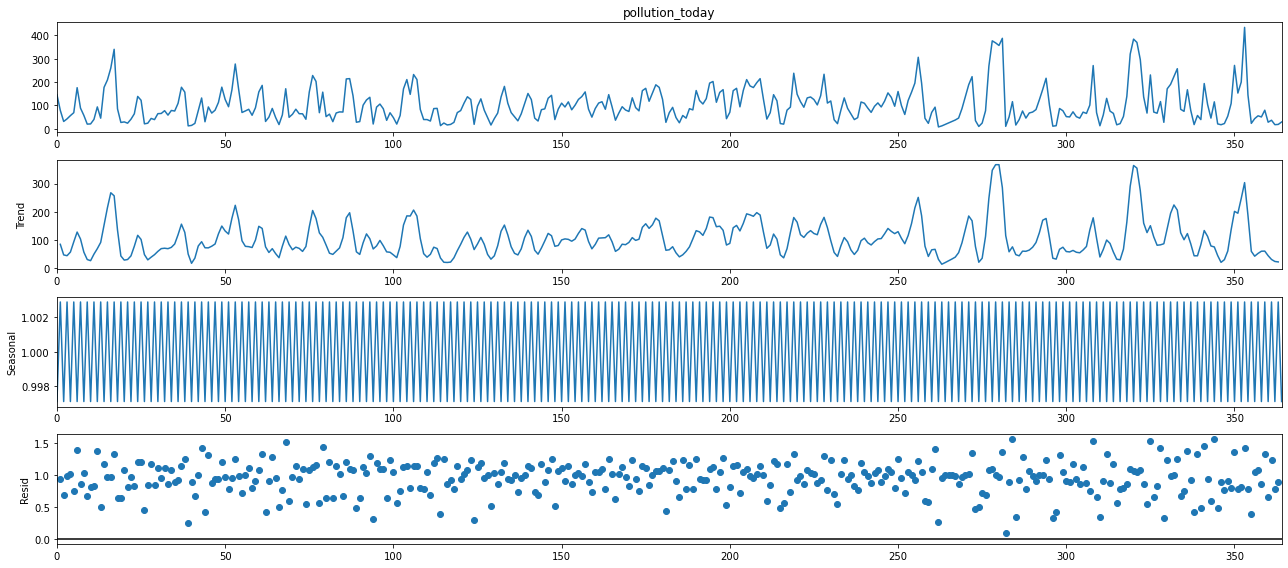

In [6]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(70, 30), dpi=80)
ser = air_dataset.pollution_today[:365]
res = seasonal_decompose(ser, model='multiplicative', period = 2)
res.plot()

#### TREND

A 'Trend' trend is observed when an increasing or decreasing slope is observed in the time series. A trend is a smooth, general, long-term, average trend. It is not always necessary for the increase or decrease to be in the same direction throughout the given period of time.There is several methods to check for trend in our series :

- The trend plot defined by pyhton
- Fit a linear regression model to identify trend

- #### TREND PLOT DEFINED BY PYTHON

<AxesSubplot:>

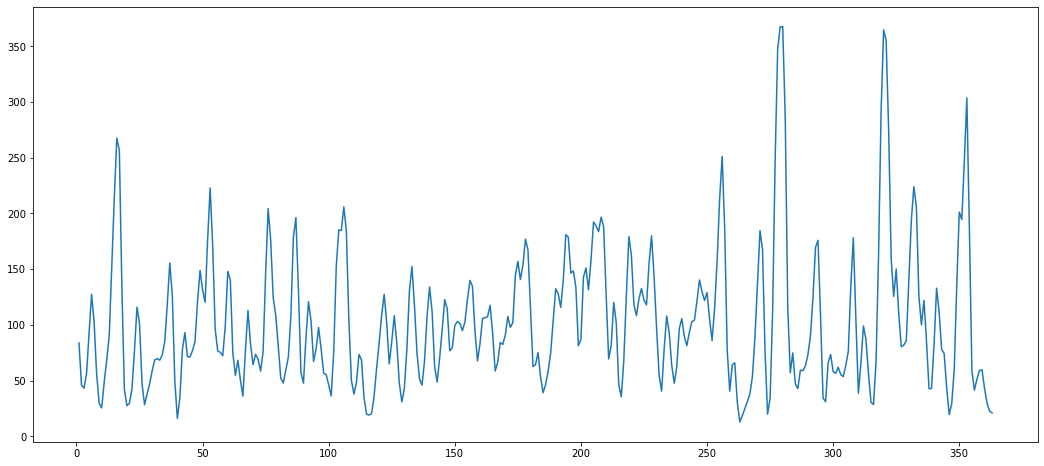

In [8]:
res.trend.plot()


- #### Trend fitted by linear regression


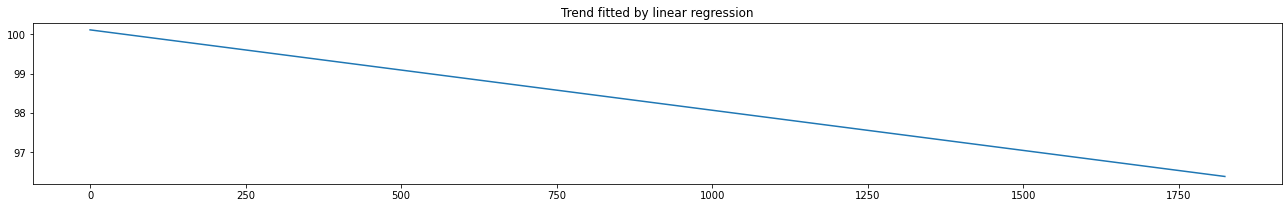

In [9]:
layout = (3, 2)

fit = plt.subplot2grid(layout, (2, 0), colspan=2)

X = [i for i in range(0, len(air_dataset.pollution_today))]
X = np.reshape(X, (len(X), 1))
y = air_dataset.pollution_today.values

model = LinearRegression()
model.fit(X, y)

trend = model.predict(X)
fit.plot(trend)
fit.set_title("Trend fitted by linear regression")

plt.tight_layout()

#### Seasonality
Seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. This can be due to the month of the year, the day of the month, the days of the week or even the time of day.



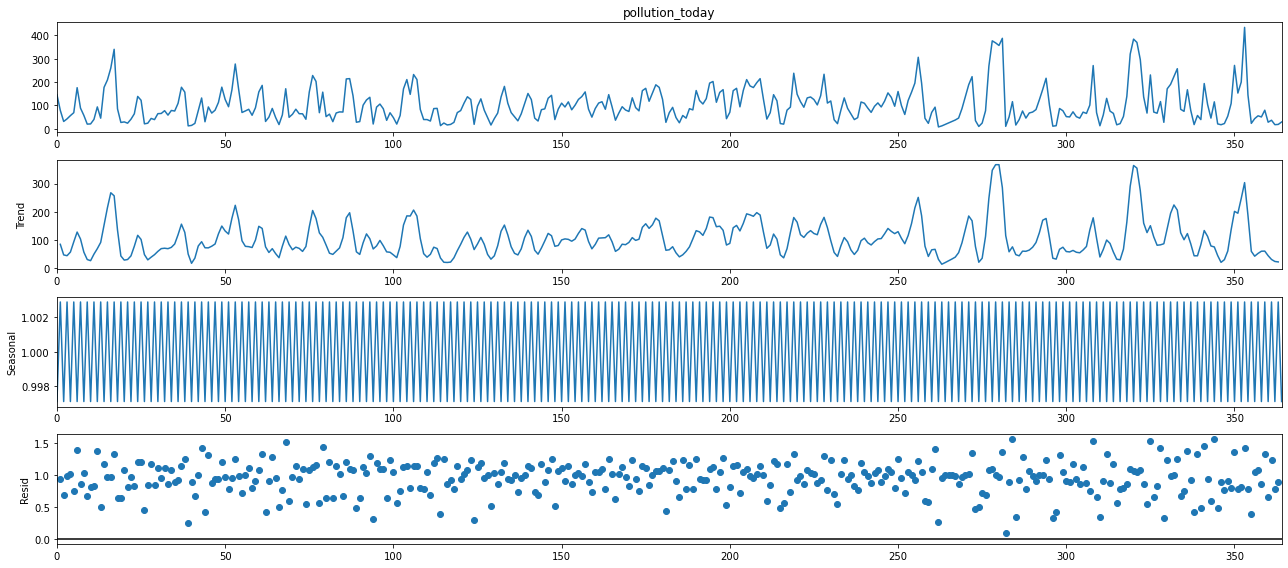

<Figure size 4000x1600 with 0 Axes>

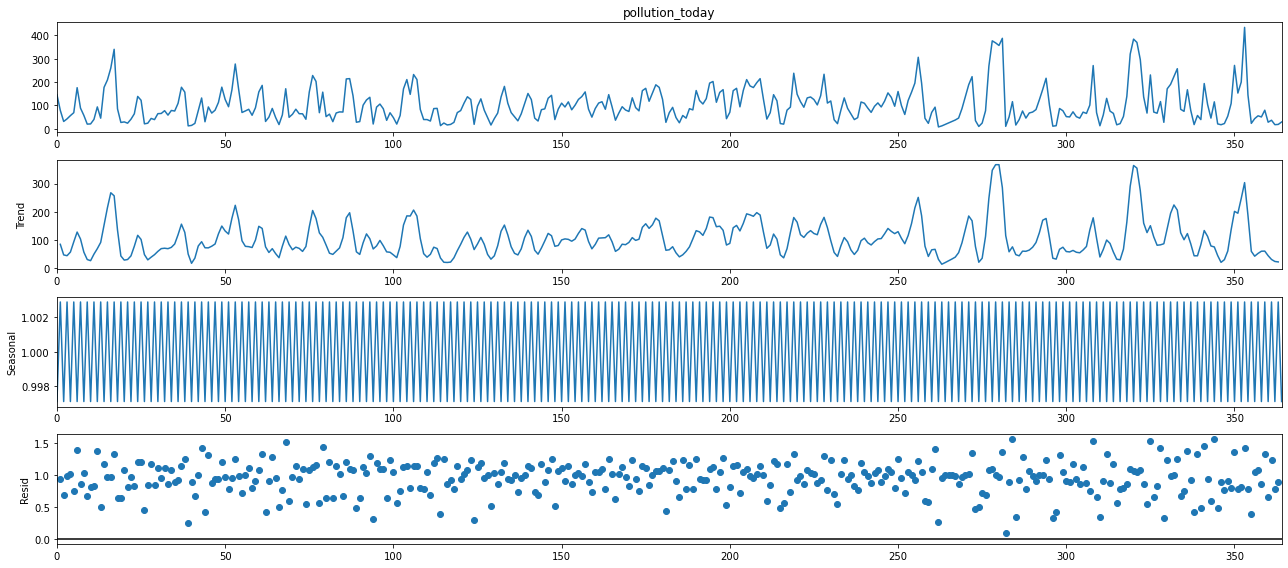

In [10]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = air_dataset.pollution_today[:365]
result = seasonal_decompose(series, model='multiplicative', period = 2)
result.plot()


#### Manual methods to find seasonality
We can also try to generate a model to find the seasonalities for us. One of the most commonly used models is a simple polynomial model.

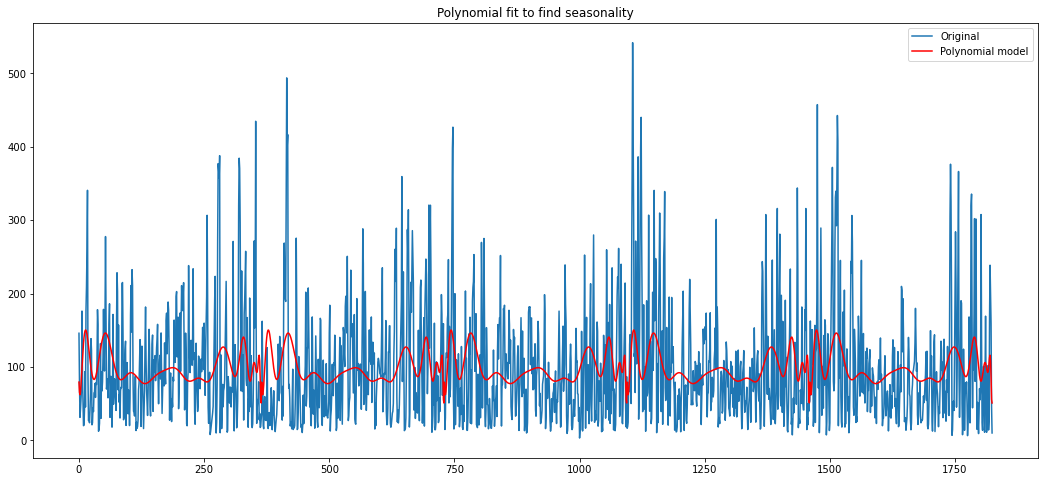

In [11]:
ser = air_dataset.pollution_today.values
X = [i % 365 for i in range(0, len(ser))]
y = ser
deg = 100
coefficients = np.polyfit(X, y, deg)

# Create curve
curve = list()
for i in range(len(X)):
    val = coefficients[-1]
    for d in range(deg):
        val += X[i]**(deg-d) * coefficients[d]
    curve.append(val)
    
# Plotting time !
plt.plot(ser, label='Original')
plt.plot(curve, color='red', label='Polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()


#### Noise component
Our time series will also have a noise component, most likely white noise. White noise is said to be present if the measurements are independent and identically distributed with an average of zero. This means that all our measurements have the same variance and no correlation with the rest of the values in the series.

- Check out our series histogram, does it look like a Gaussian distribution? Mean=0 and a consatnt standard deviation
- Correlation graphs
- Standard deviation distribution, is it a Gaussian distribution?
- Does the average or level change over time?



Text(0.5, 1.0, 'Mean over time')

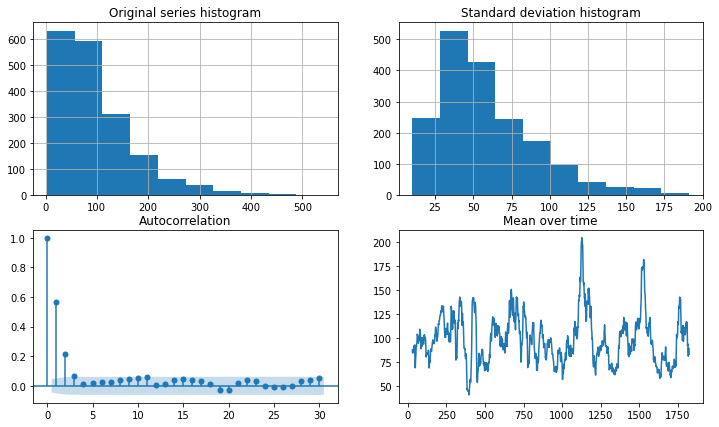

In [13]:
fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist = plt.subplot2grid(layout, (0, 0))
ac = plt.subplot2grid(layout, (1, 0))
hist_std = plt.subplot2grid(layout, (0, 1))
mean = plt.subplot2grid(layout, (1, 1))

air_dataset.pollution_today.hist(ax=hist)
hist.set_title("Original series histogram")

plot_acf(ser, lags=30, ax=ac)
ac.set_title("Autocorrelation")

sdh = air_dataset.pollution_today.rolling(7).std()
sdh.hist(ax=hist_std)
hist_std.set_title("Standard deviation histogram")

mot = air_dataset.pollution_today.rolling(30).mean()
mot.plot(ax=mean)
mean.set_title("Mean over time")

#### Autocorrelation and partial autocorrelation graphs

Autocorrelation graphs show how values at time t are correlated with subsequent values at time t+1,t+2,.. t+n. If the data are not stationary, the autocorrelation values will be strongly correlated with distant points in time showing possible seasonality or trends.

The autocorrelation values of the stationary series will decrease rapidly over time t. This shows us that no information is reported in time and that the series must then be constant in time.



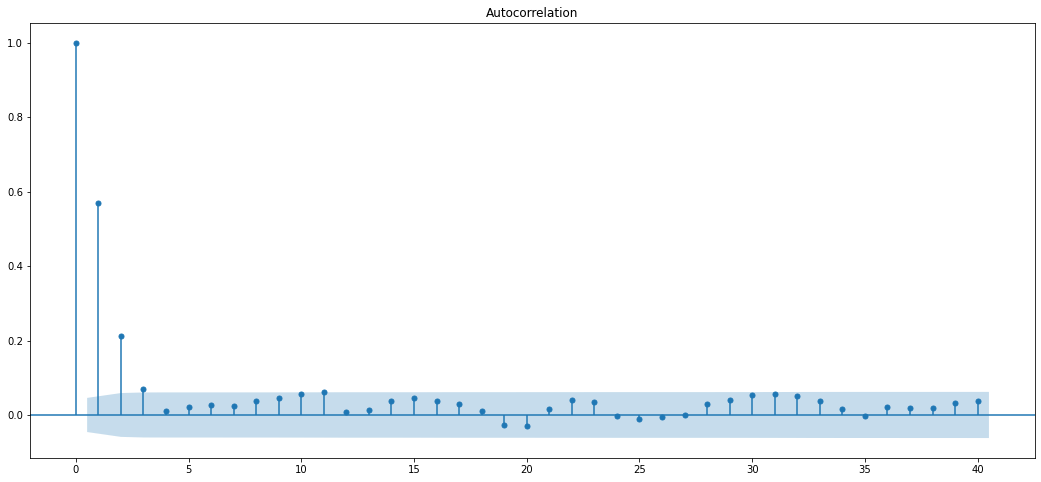

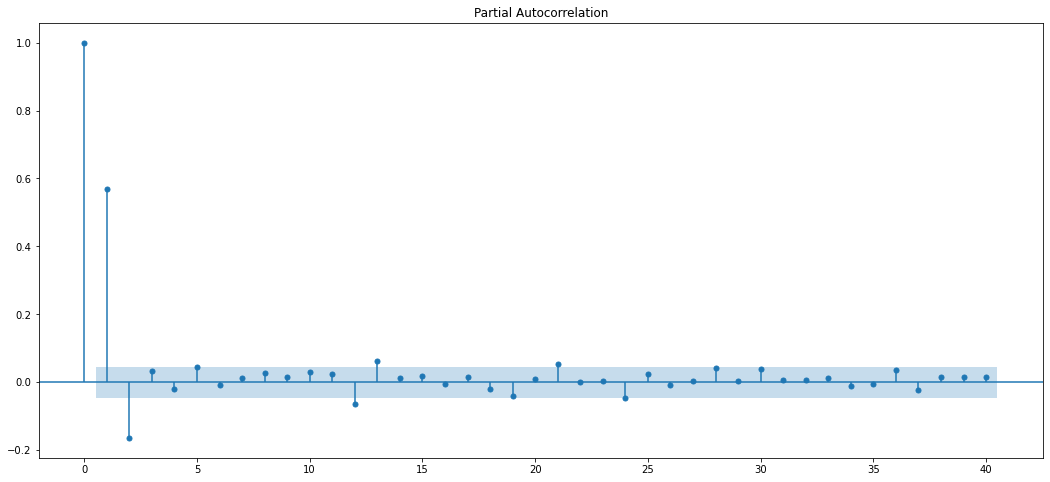

In [15]:
plot_acf(ser, lags=40)
plot_pacf(ser, lags=40)
plt.show()

#### Augmented Dickey-Fuller test
The augmented Dickey–Fuller test is a type of statistical test called the unit root test. The intuition behind a unit root test is that it determines how much a time series is defined by a trend. There are a number of unit root tests and the Augmented Dickey-Fuller is perhaps one of the most widely used. It uses an autoregressive model and optimizes an information criterion on several different offset values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has a time-dependent structure). The alternative hypothesis (rejecting the null hypothesis) is that the time series is stationary.

- #### NULL HYPOTHESIS(H0):
If it is not rejected, it suggests that the time series has a unitary root, meaning that it is non-stationary. It has a time-dependent structure.

- #### ALTERNATIVE HYPOTHESIS(H1):
The null hypothesis is rejected; This suggests that the time series has no unitary root, meaning it is stationary. It has no time-dependent structure. We interpret this result using the p-value of the test. A p-value below a threshold (such as 5% or 1%) suggests that we reject the null (stationary) hypothesis), otherwise a p-value above the threshold suggests that we do not reject the null (non-stationary) hypothesis.

#### p-value> 0.05:
failure to reject the null hypothesis (H0), the data have a unit root and are non-stationary.

#### p-value inf or = at 0.05: 
reject the null hypothesis (H0), the data have no unit root and are stationary.

In [16]:
X = air_dataset.pollution_today.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for k, val in result[4].items():
    print('\t%s: %.3f' % (k, val))

ADF Statistic: -10.116719
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Text(0.5, 1.0, 'Time Series stationary analysis Plots\n Dickey-Fuller: p=0.00000 Result: We reject stationarity')

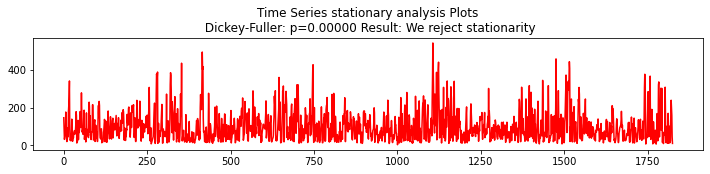

In [17]:
fig = plt.figure(figsize=(12, 7))
layout = (3, 2)
ts = plt.subplot2grid(layout, (0, 0), colspan=2)
y = pd.Series(y)
y.plot(ax=ts, color='red')
p_value = sm.tsa.stattools.adfuller(y)[1]
hypothesis_result = "We reject stationarity" if p_value <= 0.05 else "We can not reject stationarity"
ts.set_title(
    
    'Time Series stationary analysis Plots\n Dickey-Fuller: p={0:.5f} Result: {1}'.format(p_value, hypothesis_result))

#### TIME SERIES FORECASTING
There are many methods we can use for time series forecasting and there is no clear winner.

Model selection should always depend on how your data looks and what you're trying to accomplish.

Some models may be more robust against outliers, but perform less well than the most sensitive ones and might still be the best choice depending on the use case.

When looking at your data, the main division is whether we have additional regressors (characteristics) for our time series or just the series. Based on this, we can start exploring different forecasting methods and their performance in different metrics.

#### Prepare data before modeling


In [22]:
prediction = {}
air_dataset = pd.read_csv("D:/Python lab assignment/python datasets/air_pollution.csv", parse_dates=['date'])

air_dataset.set_index('date', inplace=True)

split_date = '2014-01-01'
df_train = air_dataset.loc[air_dataset.index <= split_date]
df_test = air_dataset.loc[air_dataset.index > split_date]
print(f"{len(df_train)} days of training data \n {len(df_test)} days of testing data ")

# df_train.to_csv('../input/aire-pollution-traintest/train.csv')
# df_test.to_csv('../input/aire-pollution-traintest/test.csv')



1461 days of training data 
 364 days of testing data 


#### Autoregression (AR)


The autoregressive method (AR) models the next step in the sequence as a linear function of observations at earlier time steps. Model parameters:
- Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

In [23]:
predictionsDict={}
index = len(df_train)
yhat = list()
for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = air_dataset[:len(df_train)+t]
    model = AutoReg(temp_train.pollution_today, lags=8)
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
predictionsDict['AR'] = yhat.values

100%|███████████████████████████████████████████████████████████████████████████████| 364/364 [00:02<00:00, 130.91it/s]


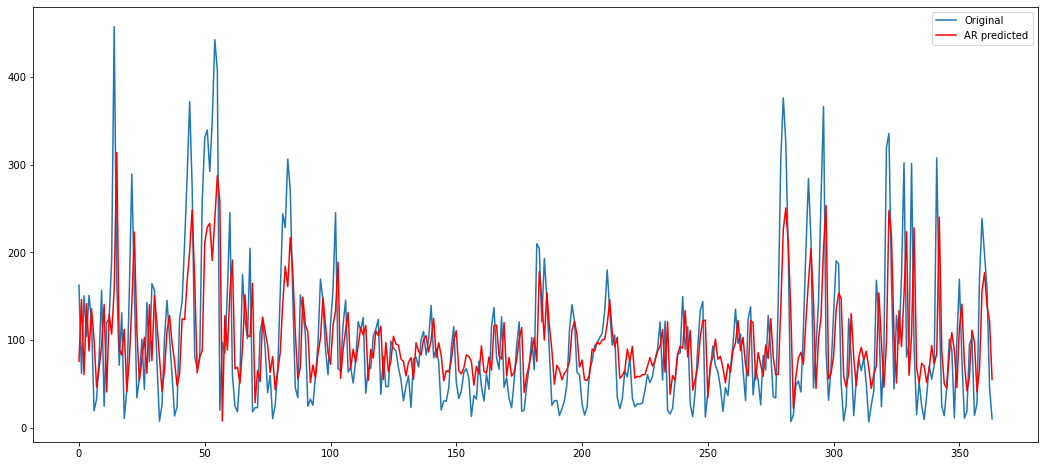

In [24]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='AR predicted')
plt.legend()


#### Autoregressive integrated moving average (ARIMA)
In an ARIMA model, 3 parameters are used to help model the main aspects of a time series: seasonality, trend and noise. These parameters are labeled p, d and q.
- Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the autoregressive aspect of the model, which incorporates the past values, i.e. the offsets of the dependent variable. For example, if p is 5, the predictors of x(t) will be x(t-1)....x(t-5).
- Number of terms MA (moving average) (q): q is the window size of the moving average part of the model, i.e. the delayed forecast errors in the prediction equation. For example, if q is 5, the predictors of x(t) will be e(t-1)....e(t-5) where e(i) is the difference between the ith moving average and the real value.



In [26]:
index = len(df_train)
yhat = list()
for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = air_dataset[:len(df_train)+t]
    model = ARIMA(temp_train.pollution_today, order=(1, 0, 0))
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
predictionsDict['ARIMA'] = yhat.values

100%|████████████████████████████████████████████████████████████████████████████████| 364/364 [00:42<00:00,  8.64it/s]


#### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

The integrated seasonal autoregressive moving average, SARIMA or seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify autoregression (AR), differentiation (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the seasonality period.The integrated seasonal autoregressive moving average, SARIMA or seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

#### Trend Elements:
There are three trending elements that require configuration. These are the same as the ARIMA model, namely:

- p: Autoregressive order of tendency.
- D: order of trend difference.
- Q: Moving Average Trend Order

#### Seasonal Elements:
There are four seasonal elements that are not part of ARIMA that need to be configured, they are:

- P: Seasonal autoregressive order.
- D: order of seasonal difference.
- Q: Seasonal moving average order.
- m: The number of time steps for a single seasonal period. For example, an S of 12 for monthly data suggests an annual seasonal cycle.



In [27]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [28]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(np.log(air_dataset),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [29]:
index = len(df_train)
yhat = list()
for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = air_dataset[:len(df_train)+t]
    model = sm.tsa.statespace.SARIMAX(temp_train.pollution_today, order=(
        1, 0, 0), seasonal_order=(0, 0, 0, 3))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
predictionsDict['SARIMAX'] = yhat.values

100%|████████████████████████████████████████████████████████████████████████████████| 364/364 [00:24<00:00, 14.80it/s]


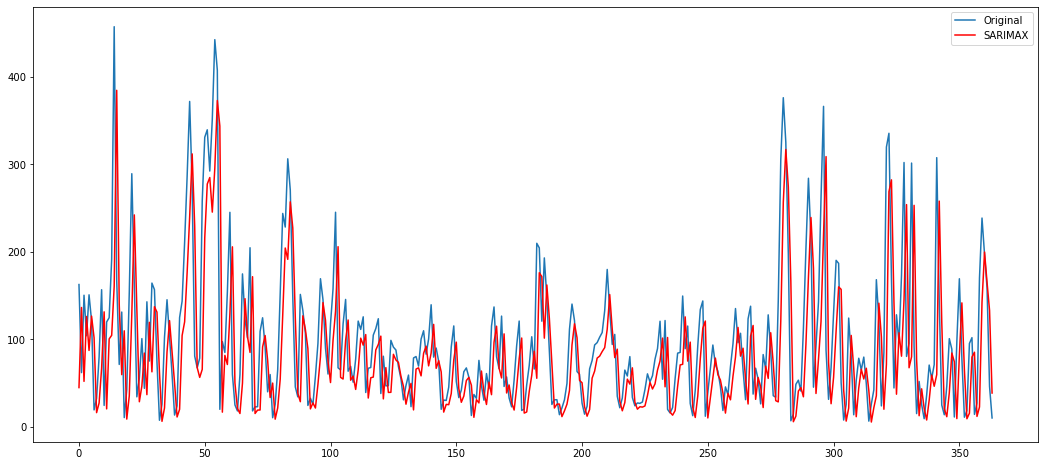

In [30]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='SARIMAX')
plt.legend()

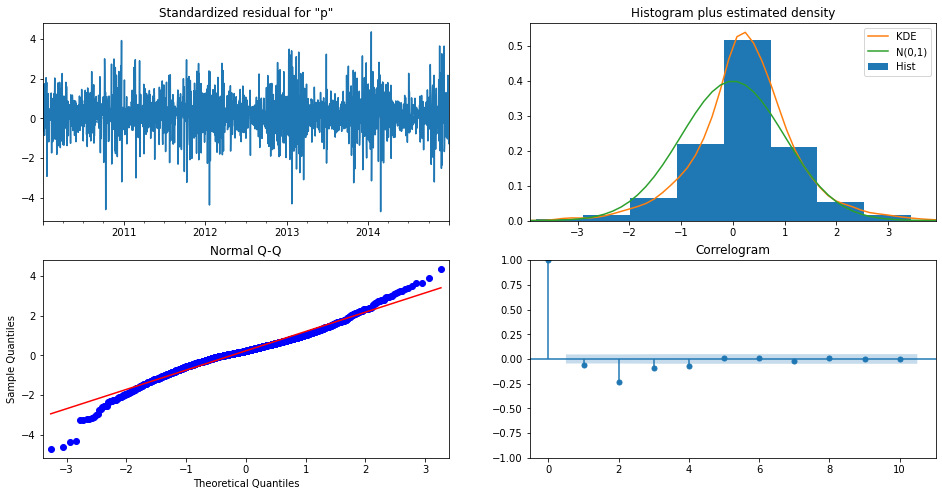

In [31]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

#### VALIDATING FORECASTING
To help us understand the accuracy of our forecasts, we compare the predicted pollution with the actual time series pollution, and we define the forecasts to start on 01/01/2014 until the end of the data

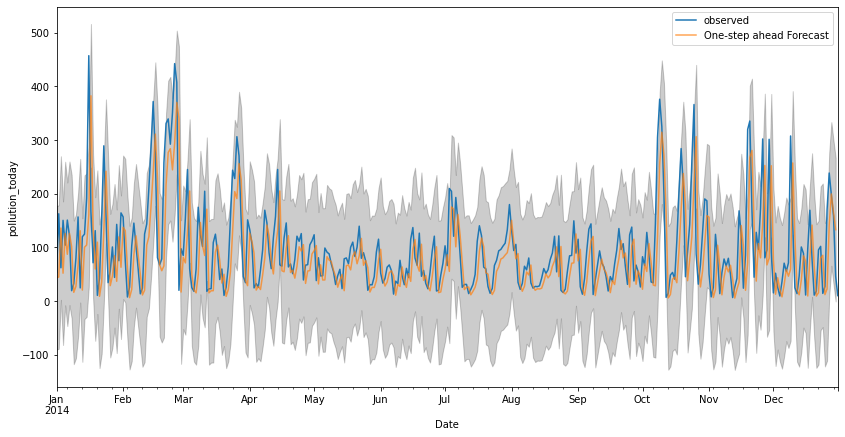

In [33]:
pred = model_fit.get_prediction(start = pd.to_datetime('2014-01-01'), dynamic = False)
pred_ci = pred.conf_int()

y = air_dataset['pollution_today']

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('pollution_today')
plt.legend()
plt.show()

In [34]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]

mse = ((y_forecasted-y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5077.08


In [35]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 71.25


In [39]:
index = len(df_train)
yhat = list()
for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = air_dataset[:len(df_train)+t]
    model = ARMA(temp_train.pollution_today, order=(1, 1))
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
predictionsDict['ARMA'] = yhat.values

100%|████████████████████████████████████████████████████████████████████████████████| 364/364 [01:13<00:00,  4.97it/s]


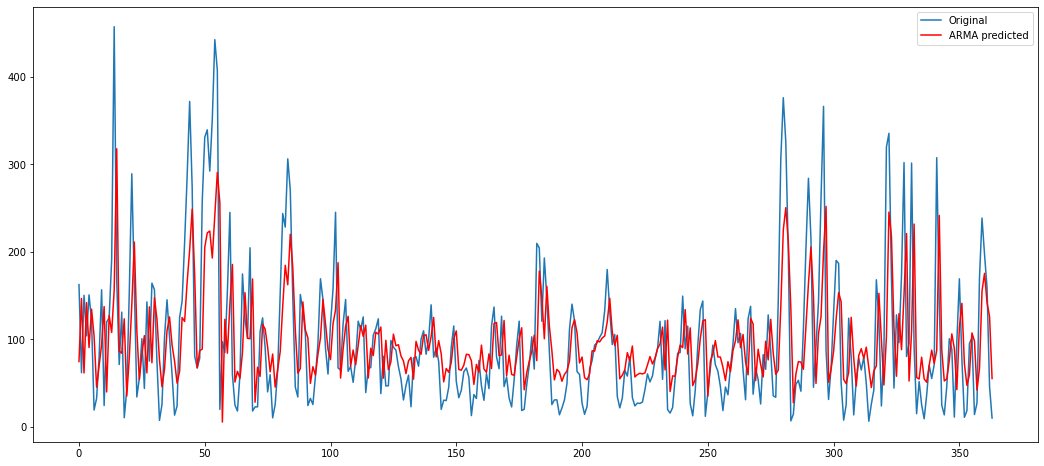

In [40]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='ARMA predicted')
plt.legend()

#### MOVING AVERAGE
The moving average (MA) method models the next step in the sequence as the average of an observation window at earlier time steps. Model parameters:

- Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

We can adjust the simple moving average (MA) model using arima(..., order = c(0, 0, 1)). Note for reference that an MA model is an ARIMA model (0, 0, 1).

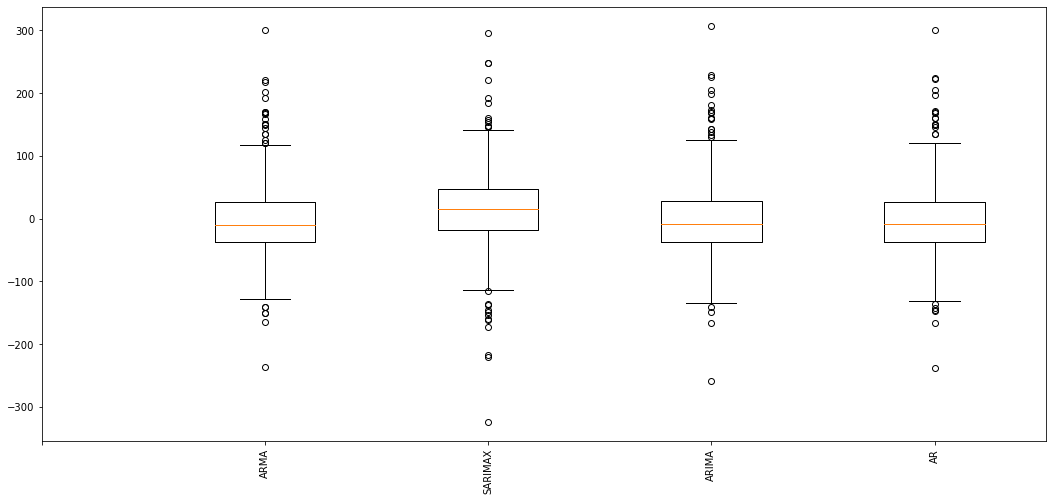

In [42]:
residuals = [df_test.pollution_today.values - predictionsDict[u]
             for u in predictionsDict.keys()]
residuals.reverse()
plt.boxplot(residuals)
ticks = list(predictionsDict.keys())
ticks.reverse()
ticks = [''] + ticks
rang = range(0, len(ticks))
plt.xticks(rang, ticks, rotation='vertical')
pass

# LSTM

In [43]:
import pandas_datareader as pdr
key=""

In [48]:
df= pd.read_csv("D:/Python lab assignment/python datasets/air_pollution.csv")


In [49]:
df.head()


,date,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
0,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
1,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
3,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
4,2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [50]:
df.tail()

,date,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
1820,2014-12-27,238.666667,-9.666667,-1.791667,1027.833333,9.278333,0.0,0.0,170.250000
1821,2014-12-28,197.375000,-10.791667,1.583333,1019.958333,10.948750,0.0,0.0,238.666667
1822,2014-12-29,159.000000,-12.333333,0.750000,1013.750000,8.000000,0.0,0.0,197.375000
1823,2014-12-30,46.083333,-13.916667,1.875000,1019.125000,9.778333,0.0,0.0,159.000000
1824,2014-12-31,10.041667,-21.791667,-1.916667,1032.125000,167.458333,0.0,0.0,46.083333


In [59]:
df1=df.reset_index()["pollution_today"]


In [60]:
df1


0       145.958333
1        78.833333
2        31.333333
3        42.458333
4        56.416667
           ...    
1820    238.666667
1821    197.375000
1822    159.000000
1823     46.083333
1824     10.041667
Name: pollution_today, Length: 1825, dtype: float64

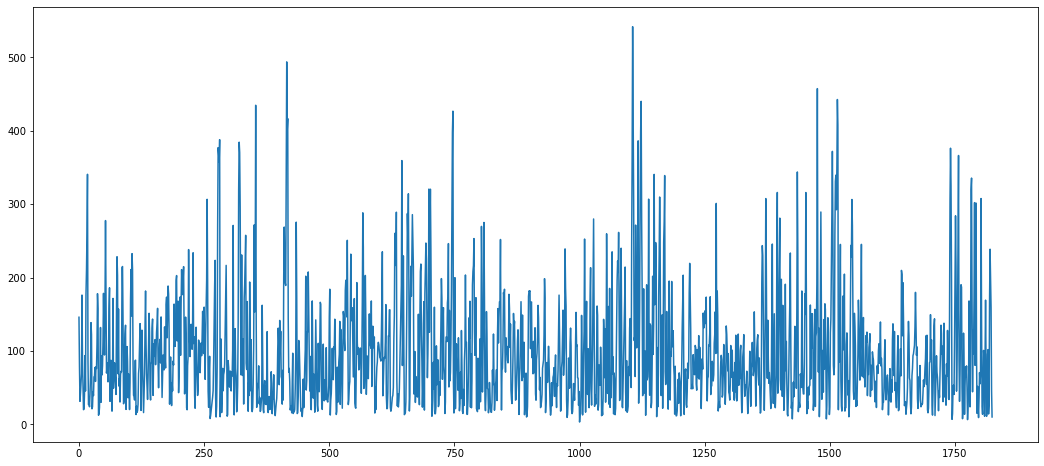

In [61]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [63]:
print(df1)


[[0.26505279]
 [0.140454  ]
 [0.05228354]
 ...
 [0.28926099]
 [0.07966279]
 [0.01276151]]


In [64]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [65]:
training_size,test_size


(1186, 639)

In [66]:
train_data


array([[0.26505279],
       [0.140454  ],
       [0.05228354],
       ...,
       [0.16605437],
       [0.35562087],
       [0.19010789]])

In [67]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [68]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [69]:
print(X_train.shape), print(y_train.shape)


(1085, 100)
(1085,)


(None, None)

In [70]:
print(X_test.shape), print(ytest.shape)


(538, 100)
(538,)


(None, None)

In [78]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [79]:
X_train

array([[[0.26505279],
        [0.140454  ],
        [0.05228354],
        ...,
        [0.15360223],
        [0.06133261],
        [0.12173711]],

       [[0.140454  ],
        [0.05228354],
        [0.07293399],
        ...,
        [0.06133261],
        [0.12173711],
        [0.08283383]],

       [[0.05228354],
        [0.07293399],
        [0.09884373],
        ...,
        [0.12173711],
        [0.08283383],
        [0.0314784 ]],

       ...,

       [[0.35028423],
        [0.43965351],
        [0.23573997],
        ...,
        [0.35662632],
        [0.17487142],
        [0.05568661]],

       [[0.43965351],
        [0.23573997],
        [0.03936734],
        ...,
        [0.17487142],
        [0.05568661],
        [0.17603156]],

       [[0.23573997],
        [0.03936734],
        [0.03626095],
        ...,
        [0.05568661],
        [0.17603156],
        [0.16605437]]])

In [80]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [81]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [82]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
17/17 [==============================] - 9s 216ms/step - loss: 0.0261 - val_loss: 0.0202
Epoch 2/100
17/17 [==============================] - 3s 150ms/step - loss: 0.0217 - val_loss: 0.0201
Epoch 3/100
17/17 [==============================] - 2s 145ms/step - loss: 0.0217 - val_loss: 0.0202
Epoch 4/100
17/17 [==============================] - 2s 143ms/step - loss: 0.0220 - val_loss: 0.0201
Epoch 5/100
17/17 [==============================] - 2s 145ms/step - loss: 0.0216 - val_loss: 0.0202
Epoch 6/100
17/17 [==============================] - 2s 144ms/step - loss: 0.0215 - val_loss: 0.0200
Epoch 7/100
17/17 [==============================] - 2s 144ms/step - loss: 0.0216 - val_loss: 0.0202
Epoch 8/100
17/17 [==============================] - 2s 142ms/step - loss: 0.0219 - val_loss: 0.0200
Epoch 9/100
17/17 [==============================] - 2s 142ms/step - loss: 0.0215 - val_loss: 0.0202
Epoch 10/100
17/17 [==============================] - 2s 143ms/step - loss: 0.0213 - val_lo

In [76]:
import tensorflow as tf


In [84]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [85]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [86]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

116.96070728871048

In [87]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

113.28985082975882

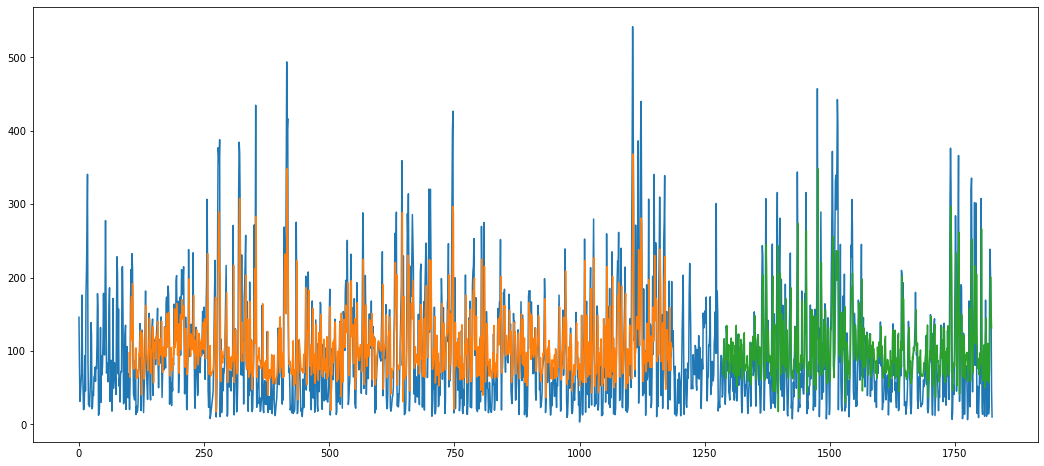

In [88]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [94]:
len(test_data)


639

In [95]:
x_input=test_data[539:].reshape(1,-1)
x_input.shape

(1, 100)

In [96]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [97]:
temp_input


[0.11489230055299894,
 0.05158745504466528,
 0.22313314513322244,
 0.24997099655825825,
 0.06342085927530067,
 0.118411384817665,
 0.09505394640163965,
 0.04261572373254959,
 0.14733748404810704,
 0.11624579450094744,
 0.23164082137747005,
 0.15499439266792991,
 0.0600177887776016,
 0.05692408832514792,
 0.26110831818709157,
 0.5606558644959201,
 0.6926021887930701,
 0.5980896399706098,
 0.360880157778723,
 0.006806140995398119,
 0.020882478054062414,
 0.08414865230674039,
 0.09296569859623341,
 0.06976294520283073,
 0.2026373796357167,
 0.3717854518736223,
 0.5215978962836924,
 0.3933640125294868,
 0.07811593642445569,
 0.16512626164971575,
 0.259638810472176,
 0.4793688851076995,
 0.6741946711009706,
 0.1566185854054681,
 0.052283537646467364,
 0.11949417997602382,
 0.236358714567462,
 0.3473452182992381,
 0.34092578986039673,
 0.0874743802931281,
 0.008352991221624965,
 0.04122355852894543,
 0.22483468038207202,
 0.14238756332418112,
 0.01949031285045825,
 0.09226961599443133,
 0.13

In [98]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.12079007]
101
1 day input [0.05158746 0.22313315 0.249971   0.06342086 0.11841138 0.09505395
 0.04261572 0.14733748 0.11624579 0.23164082 0.15499439 0.06001779
 0.05692409 0.26110832 0.56065586 0.69260219 0.59808964 0.36088016
 0.00680614 0.02088248 0.08414865 0.0929657  0.06976295 0.20263738
 0.37178545 0.5215979  0.39336401 0.07811594 0.16512626 0.25963881
 0.47936889 0.67419467 0.15661859 0.05228354 0.11949418 0.23635871
 0.34734522 0.34092579 0.08747438 0.00835299 0.04122356 0.22483468
 0.14238756 0.01949031 0.09226962 0.13952589 0.11477629 0.14200085
 0.0856955  0.00603272 0.0423837  0.07246993 0.30627634 0.22127692
 0.03836189 0.15221006 0.58788043 0.6170683  0.30810282 0.0764144
 0.23179551 0.17255114 0.31555745 0.55500986 0.14339302 0.17115898
 0.55384972 0.16381144 0.02204262 0.09025871 0.04122356 0.01121466
 0.06164198 0.12506284 0.09667814 0.12610696 0.56533509 0.25948413
 0.04014076 0.01956766 0.0805909  0.18113616 0.15886152 0.01477242
 0.17549016 0.30828725 0.13828841 

8 day output [[0.2224318]]
9 day input [0.11624579 0.23164082 0.15499439 0.06001779 0.05692409 0.26110832
 0.56065586 0.69260219 0.59808964 0.36088016 0.00680614 0.02088248
 0.08414865 0.0929657  0.06976295 0.20263738 0.37178545 0.5215979
 0.39336401 0.07811594 0.16512626 0.25963881 0.47936889 0.67419467
 0.15661859 0.05228354 0.11949418 0.23635871 0.34734522 0.34092579
 0.08747438 0.00835299 0.04122356 0.22483468 0.14238756 0.01949031
 0.09226962 0.13952589 0.11477629 0.14200085 0.0856955  0.00603272
 0.0423837  0.07246993 0.30627634 0.22127692 0.03836189 0.15221006
 0.58788043 0.6170683  0.30810282 0.0764144  0.23179551 0.17255114
 0.31555745 0.55500986 0.14339302 0.17115898 0.55384972 0.16381144
 0.02204262 0.09025871 0.04122356 0.01121466 0.06164198 0.12506284
 0.09667814 0.12610696 0.56533509 0.25948413 0.04014076 0.01956766
 0.0805909  0.18113616 0.15886152 0.01477242 0.17549016 0.30828725
 0.13828841 0.01438571 0.02846204 0.17092695 0.18322441 0.02034108
 0.04423992 0.31014347 0

16 day output [[0.20557034]]
17 day input [0.59808964 0.36088016 0.00680614 0.02088248 0.08414865 0.0929657
 0.06976295 0.20263738 0.37178545 0.5215979  0.39336401 0.07811594
 0.16512626 0.25963881 0.47936889 0.67419467 0.15661859 0.05228354
 0.11949418 0.23635871 0.34734522 0.34092579 0.08747438 0.00835299
 0.04122356 0.22483468 0.14238756 0.01949031 0.09226962 0.13952589
 0.11477629 0.14200085 0.0856955  0.00603272 0.0423837  0.07246993
 0.30627634 0.22127692 0.03836189 0.15221006 0.58788043 0.6170683
 0.30810282 0.0764144  0.23179551 0.17255114 0.31555745 0.55500986
 0.14339302 0.17115898 0.55384972 0.16381144 0.02204262 0.09025871
 0.04122356 0.01121466 0.06164198 0.12506284 0.09667814 0.12610696
 0.56533509 0.25948413 0.04014076 0.01956766 0.0805909  0.18113616
 0.15886152 0.01477242 0.17549016 0.30828725 0.13828841 0.01438571
 0.02846204 0.17092695 0.18322441 0.02034108 0.04423992 0.31014347
 0.43713987 0.36049345 0.28926099 0.07966279 0.01276151 0.12079007
 0.17005336 0.19724153

24 day output [[0.19938985]]
25 day input [0.37178545 0.5215979  0.39336401 0.07811594 0.16512626 0.25963881
 0.47936889 0.67419467 0.15661859 0.05228354 0.11949418 0.23635871
 0.34734522 0.34092579 0.08747438 0.00835299 0.04122356 0.22483468
 0.14238756 0.01949031 0.09226962 0.13952589 0.11477629 0.14200085
 0.0856955  0.00603272 0.0423837  0.07246993 0.30627634 0.22127692
 0.03836189 0.15221006 0.58788043 0.6170683  0.30810282 0.0764144
 0.23179551 0.17255114 0.31555745 0.55500986 0.14339302 0.17115898
 0.55384972 0.16381144 0.02204262 0.09025871 0.04122356 0.01121466
 0.06164198 0.12506284 0.09667814 0.12610696 0.56533509 0.25948413
 0.04014076 0.01956766 0.0805909  0.18113616 0.15886152 0.01477242
 0.17549016 0.30828725 0.13828841 0.01438571 0.02846204 0.17092695
 0.18322441 0.02034108 0.04423992 0.31014347 0.43713987 0.36049345
 0.28926099 0.07966279 0.01276151 0.12079007 0.17005336 0.19724153
 0.21474671 0.22412908 0.22779429 0.22770038 0.22550255 0.22243179
 0.21926156 0.2163716

In [134]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [135]:
import matplotlib.pyplot as plt


In [136]:
len(df1)


1825

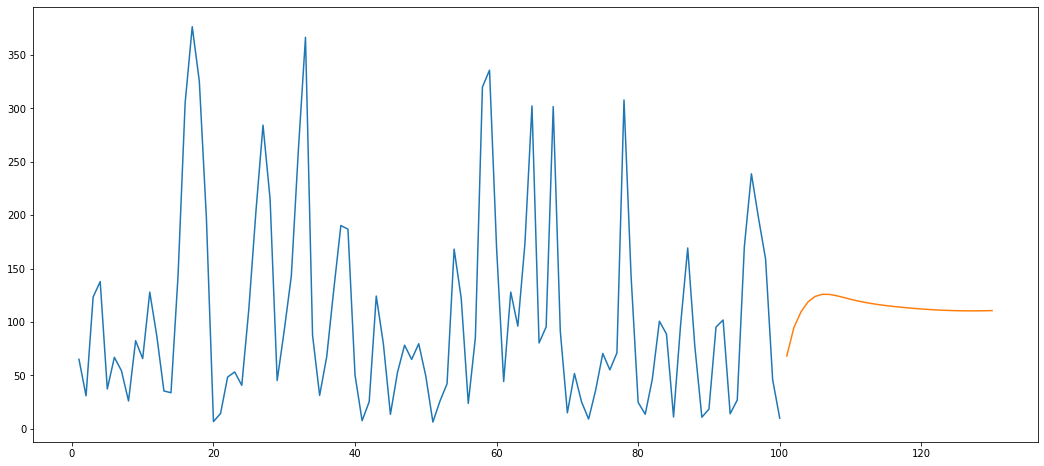

In [137]:
plt.plot(day_new,scaler.inverse_transform(df1[1725:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

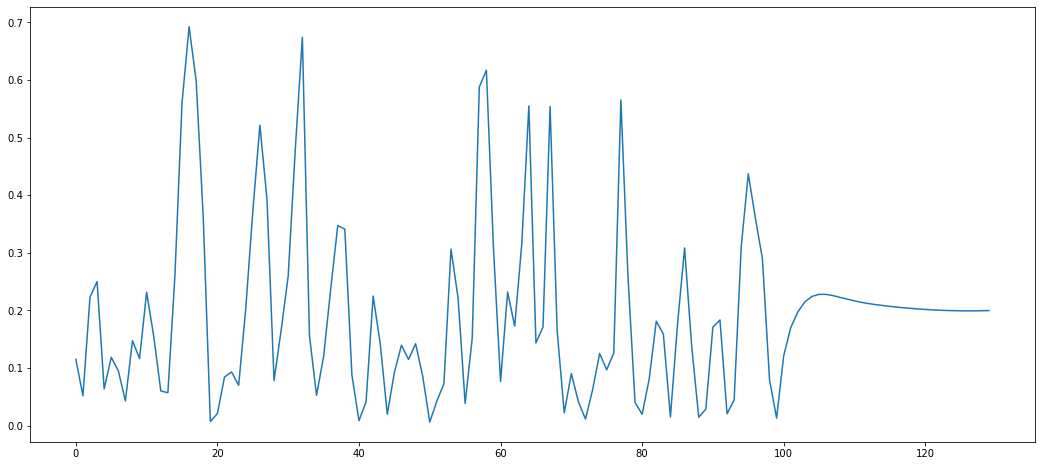

In [139]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1725:])

In [105]:
df3=scaler.inverse_transform(df3).tolist()


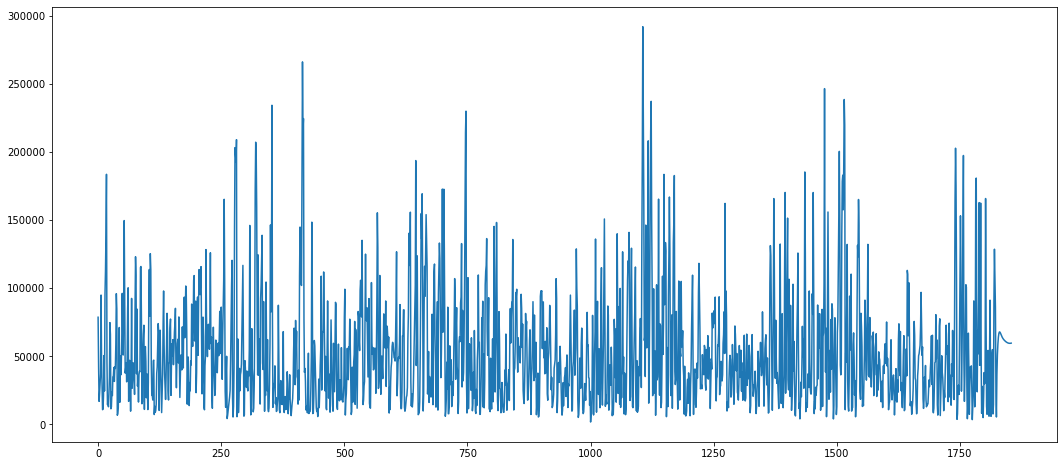

In [106]:
plt.plot(df3)
